# Machine Learning Model - Feature Engineering (Tổng hợp biến phái sinh)

In [ ]:
# Ví dụ dữ liệu Nominal và Ordinal
# Ví dụ dữ liệu Nominal
arr2 = ['bò sát', 'có vú', 'gia cầm', 'giáp xác']

# Ví dụ biến dạng Ordinal
# Trình độ học vấn
arr = ['cấp 1', 'cấp 2', 'cấp 3', 'đại học', 'sau đại học'] # => sự sắp xếp nhất định
arr_int = [1, 2, 3, 4, 5]

# Cấp bậc trong công ty
arr1 = ['nhân viên', 'nhóm trưởng', 'trưởng phòng', 'giám đốc chi nhánh', 'giám đốc vùng'] # => thứ tự nhất định

# Nominal dữ liệu chữ nhưng ko có giá trị để sắp xếp


In [ ]:
# Biến dạng số
# Continuous - liên tục
# Số thập phân 
# 0.1 0.11 0.111 0.112 0.1111

# Discrete - rời rạc
# Số nguyên
# 1 2 3 4 5 6

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dữ liệu Titanic

In [12]:
titanic = sns.load_dataset('titanic')
display(titanic.info(), titanic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [ ]:
# titanic = titanic.drop(columns=['survived', 'pclass', 'embarked', 'who', 'adult_male', 'alone'])
# titanic

## Kiểm tra chất lượng dữ liệu

In [13]:
titanic.isnull().sum() # Python True = 1, False = 0

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Xử lý chất lượng dữ liệu

### Thuyết âm mưu 1: Deck theo hạng vé

In [14]:
titanic.pivot_table(
    index='deck',
    columns='pclass',
    values='survived',
    aggfunc='count'
).fillna(0)

pclass   1  2  3
deck            
A       15  0  0
B       47  0  0
C       59  0  0
D       29  4  0
E       25  4  3
F        0  8  5
G        0  0  4

<AxesSubplot:xlabel='deck', ylabel='count'>

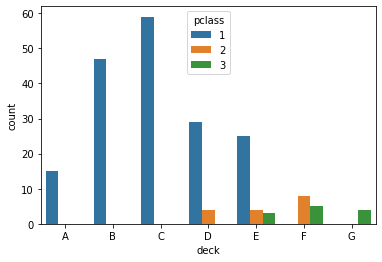

In [15]:
sns.countplot(data=titanic, x='deck', hue='pclass')

In [ ]:
# Logic điền: 1class = C, 2class = F, 3class = F

In [16]:
deck_dict = {
    1: 'C',
    2: 'F',
    3: 'F'
}
ser = titanic['pclass'].map(deck_dict) # pandas series mới, chưa gán đè lên dữ liệu cũ
ser

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    C
888    F
889    C
890    F
Name: pclass, Length: 891, dtype: object

In [17]:
new_deck = titanic['deck'].combine_first(ser)
new_deck

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [18]:
new_deck.isnull().sum()

0

In [19]:
titanic['deck'] = new_deck

In [ ]:
# Fillna for deck: một cách khác

In [20]:
titanic['deck'].value_counts(dropna=False)

F    660
C    100
B     47
D     33
E     32
A     15
G      4
Name: deck, dtype: int64

In [21]:
titanic['deck'].fillna('Unknown')

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [22]:
titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')
titanic['deck']

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [23]:
titanic['deck'].fillna('Unknown')

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [24]:
titanic['deck'] = titanic['deck'].fillna('Unknown')

In [25]:
titanic['deck'].isnull().sum()

0

### Thuyết âm mưu 02: Embark Town

In [26]:
titanic['embark_town'].value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [27]:
filter1 = titanic['embark_town'].isnull() # lọc các bản ghi bị thiếu dữ liệu embark_town
titanic[filter1]

survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
61          1       1  female  38.0      0      0  80.0      NaN  First   
829         1       1  female  62.0      0      0  80.0      NaN  First   

       who  adult_male deck embark_town alive  alone  
61   woman       False    B         NaN   yes   True  
829  woman       False    B         NaN   yes   True

In [28]:
titanic['embark_town'].fillna('Unknown') # No brainer (ít quan sát bị thiếu)

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [29]:
filter1 = (titanic['who'] == 'woman') 
filter2 = (titanic['class'] == 'First')
# filter3 = (titanic['fare'] == 80)
ser = titanic[filter1 & filter2]
ser

survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
1           1       1  female  38.0      1      0   71.2833        C  First   
3           1       1  female  35.0      1      0   53.1000        S  First   
11          1       1  female  58.0      0      0   26.5500        S  First   
31          1       1  female   NaN      1      0  146.5208        C  First   
52          1       1  female  49.0      1      0   76.7292        C  First   
..        ...     ...     ...   ...    ...    ...       ...      ...    ...   
856         1       1  female  45.0      1      1  164.8667        S  First   
862         1       1  female  48.0      0      0   25.9292        S  First   
871         1       1  female  47.0      1      1   52.5542        S  First   
879         1       1  female  56.0      0      1   83.1583        C  First   
887         1       1  female  19.0      0      0   30.0000        S  First   

       who  adult_male deck  embark_town alive  alone  
1    woman       False    C    Cherbourg   yes  False  
3    woman       False    C  Southampton   yes  False  
11   woman       False    C  Southampton   yes   True  
31   woman       False    B    Cherbourg   yes  False  
52   woman       False    D    Cherbourg   yes  False  
..     ...         ...  ...          ...   ...    ...  
856  woman       False    C  Southampton   yes  False  
862  woman       False    D  Southampton   yes   True  
871  woman       False    D  Southampton   yes  False  
879  woman       False    C    Cherbourg   yes  False  
887  woman       False    B  Southampton   yes   True  

[91 rows x 15 columns]

In [30]:
ser['embark_town'].value_counts() # mặc định sẽ thể hiện giá trị lớn nhất trên cùng .index[0]

Southampton    45
Cherbourg      43
Queenstown      1
Name: embark_town, dtype: int64

In [31]:
most_pop_town = ser['embark_town'].value_counts().idxmax()
most_pop_town

'Southampton'

In [32]:
titanic['embark_town'] = titanic['embark_town'].fillna(most_pop_town)

In [33]:
titanic['embark_town'].value_counts(dropna=False)

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [34]:
titanic['embark_town'] = titanic['embark_town'].fillna('Unknown')

In [35]:
titanic['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

### Thuyết âm mưu 03: Điền tuổi

In [36]:
titanic['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [37]:
titanic['age'].isnull().sum() / len(titanic['age'])

0.19865319865319866

<AxesSubplot:xlabel='age', ylabel='Count'>

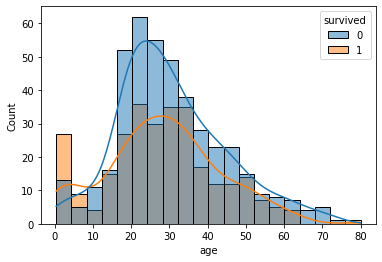

In [38]:
sns.histplot(titanic, x='age', hue='survived', kde=True)
# sns.<tên của plot>(
#     <bộ dữ liệu>, 
#     x=<cột dữ liệu x>, 
#     y=<cột dữ liệu y>, 
#     hue=<cột dữ liệu để phân loại>, 
#     kde=True # để vẽ đường cong thể hiện phân phối (đường cong đẹp đẹp)
# )

<AxesSubplot:xlabel='age', ylabel='fare'>

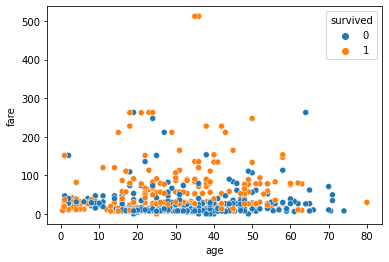

In [39]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived')

In [40]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [41]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [42]:
titanic['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

<AxesSubplot:xlabel='age', ylabel='parch'>

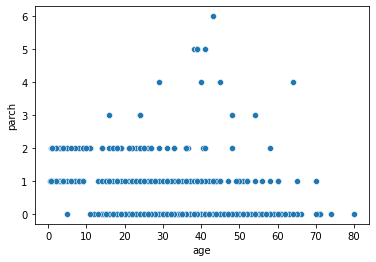

In [43]:
sns.scatterplot(data=titanic, x='age', y='parch')

<AxesSubplot:xlabel='parch', ylabel='age'>

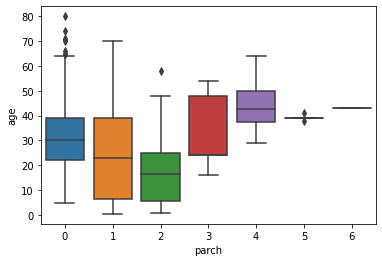

In [44]:
sns.boxplot(data=titanic, x='parch', y='age')
# Biểu đồ dạng nến:
# đường trên cùng của nên ~ 90%
# dưới cùng ~ 10%
# Trong hộp: bên trên là 75% bên dưới là 25% và ở giữa là 50% 
# Khoảng cách về giá trị giữa 25% - 75% gọi là IQR (InterQuartileRange)

In [45]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg(lambda x: x.isnull().sum()/len(x))
# Tính tỷ lệ số lượng bản ghi bị thiếu dữ liệu cho mỗi phân loại

who    sibsp  parch
child  0      0        0.000000
              1        0.000000
              2        0.000000
       1      0        0.000000
              1        0.000000
              2        0.000000
       2      1        0.000000
              2        0.000000
       3      1        0.000000
              2        0.000000
       4      1        0.000000
              2        0.000000
       5      2        0.000000
man    0      0        0.260976
              1        0.000000
              2        0.000000
       1      0        0.118644
              1        0.095238
              2        0.200000
              3        0.000000
              4        0.000000
              5        0.000000
       2      0        0.153846
              1        0.000000
       3      1        1.000000
              2        0.000000
       4      1        0.000000
       8      2        1.000000
woman  0      0        0.214876
              1        0.055556
              2     

In [46]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])
# Lấy ra thông tin số lượng bản ghi cho mỗi nhóm
# Độ tuổi trung bình cho mỗi nhóm
# Tỷ lệ bị thiếu của mỗi nhóm

len       mean  <lambda_0>
who   sibsp parch                            
child 0     0        6  12.166667    0.000000
            1        8   6.052500    0.000000
            2        9   4.981111    0.000000
      1     0        5  13.900000    0.000000
            1       15   4.566667    0.000000
            2        7   5.274286    0.000000
      2     1        5   2.300000    0.000000
            2        1   9.000000    0.000000
      3     1        3   4.333333    0.000000
            2        4   6.250000    0.000000
      4     1        8   5.625000    0.000000
            2        8   6.125000    0.000000
      5     2        4   8.750000    0.000000
man   0     0      410  32.973597    0.260976
            1       12  38.583333    0.000000
            2        5  35.800000    0.000000
      1     0       59  32.701923    0.118644
            1       21  36.000000    0.095238
            2        5  30.750000    0.200000
            3        1  16.000000    0.000000
            4        2  52.000000    0.000000
            5        1  39.000000    0.000000
      2     0       13  31.181818    0.153846
            1        1  23.000000    0.000000
      3     1        1        NaN    1.000000
            2        1  19.000000    0.000000
      4     1        1  16.000000    0.000000
      8     2        4        NaN    1.000000
woman 0     0      121  31.084211    0.214876
            1       18  34.176471    0.055556
            2       15  26.833333    0.200000
            3        1  24.000000    0.000000
            4        1  29.000000    0.000000
            5        2  40.000000    0.000000
      1     0       59  33.355556    0.237288
            1       21  35.450000    0.047619
            2        7  31.333333    0.142857
            3        2  51.000000    0.000000
            4        1  45.000000    0.000000
            5        2  38.500000    0.000000
            6        1  43.000000    0.000000
      2     0        3  35.500000    0.333333
            1        1  24.000000    0.000000
            2        3  20.000000    0.000000
            3        1  24.000000    0.000000
      3     0        2  31.500000    0.000000
            1        3        NaN    1.000000
            2        2  23.500000    0.000000
      4     2        1  17.000000    0.000000
      5     2        1  16.000000    0.000000
      8     2        3        NaN    1.000000

In [47]:
ser = titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean())) 
# điền các giá trị bị thiếu bằng giá trị trung bình của nhóm
ser

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [48]:
ser.isnull().sum()

11

In [49]:
titanic['age'] = ser

In [50]:
titanic.groupby(['sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])

len       mean  <lambda_0>
sibsp parch                            
0     0      537  32.315390    0.000000
      1       38  29.647276    0.000000
      2       29  21.597586    0.000000
      3        1  24.000000    0.000000
      4        1  29.000000    0.000000
      5        2  40.000000    0.000000
1     0      123  32.251148    0.000000
      1       57  27.525439    0.000000
      2       19  21.579123    0.000000
      3        3  39.333333    0.000000
      4        3  49.666667    0.000000
      5        3  38.666667    0.000000
      6        1  43.000000    0.000000
2     0       16  31.991477    0.000000
      1        7   8.357143    0.000000
      2        4  17.250000    0.000000
      3        1  24.000000    0.000000
3     0        2  31.500000    0.000000
      1        7   4.333333    0.571429
      2        7  13.000000    0.000000
4     1        9   6.777778    0.000000
      2        9   7.333333    0.000000
5     2        5  10.200000    0.000000
8     2        7        NaN    1.000000

In [51]:
ser = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
ser

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [52]:
ser.isnull().sum()

7

In [53]:
titanic['age'] = ser

In [54]:
titanic['age'].isnull().sum()

7

In [55]:
child_avg_age = titanic[titanic['who'] == 'child']['age'].mean()
child_avg_age

6.369518072289157

In [56]:
titanic['age'] = titanic['age'].fillna(child_avg_age)

In [57]:
titanic['age'].isnull().sum()

0

In [58]:
# Dien du lieu bi thieu bang tep sisp va parch lon nhat

## Tạo biến mới

### Chia bin dữ liệu

<AxesSubplot:xlabel='age', ylabel='Probability'>

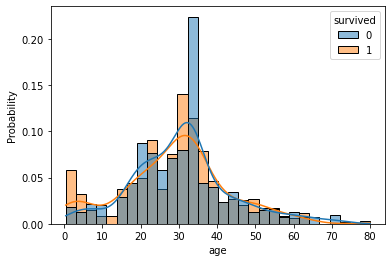

In [59]:
sns.histplot(
    data=titanic, 
    x='age', 
    hue='survived', # Chia biểu đồ thành 02 biểu đồ dạng chồng lên nhau
    kde=True, 
    stat='probability', # Tính tỷ lệ phần trăm thay vì đếm
    common_norm=False # Tính tỷ lệ cho từng phân loại thay vì tính cho chung toàn bộ dữ liệu
)

In [60]:
age_groups = [0, 15, 25, 35, 45, 60, 80, 100]
pd.cut(titanic['age'], bins=age_groups) # Chia dữ liệu theo bước tuổi định sẵn

0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age, Length: 891, dtype: category
Categories (7, interval[int64, right]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] < (80, 100]]

In [61]:
titanic['age_group'] = pd.cut(titanic['age'], bins=age_groups)
titanic['age_group']

0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age_group, Length: 891, dtype: category
Categories (7, interval[int64, right]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] < (80, 100]]

In [62]:
titanic

survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  31.333333      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male deck  embark_town alive  alone age_group  
0     Third    man        True    F  Southampton    no  False  (15, 25]  
1     First  woman       False    C    Cherbourg   yes  False  (35, 45]  
2     Third  woman       False    F  Southampton   yes   True  (25, 35]  
3     First  woman       False    C  Southampton   yes  False  (25, 35]  
4     Third    man        True    F  Southampton    no   True  (25, 35]  
..      ...    ...         ...  ...          ...   ...    ...       ...  
886  Second    man        True    F  Southampton    no   True  (25, 35]  
887   First  woman       False    B  Southampton   yes   True  (15, 25]  
888   Third  woman       False    F  Southampton    no  False  (25, 35]  
889   First    man        True    C    Cherbourg   yes   True  (25, 35]  
890   Third    man        True    F   Queenstown    no   True  (25, 35]  

[891 rows x 16 columns]

### Tạo biến chỉ báo

In [63]:
# Thuyết âm mưu số 4:
# Có sự liên hệ giữa các quý bà và tỷ lẹ survived

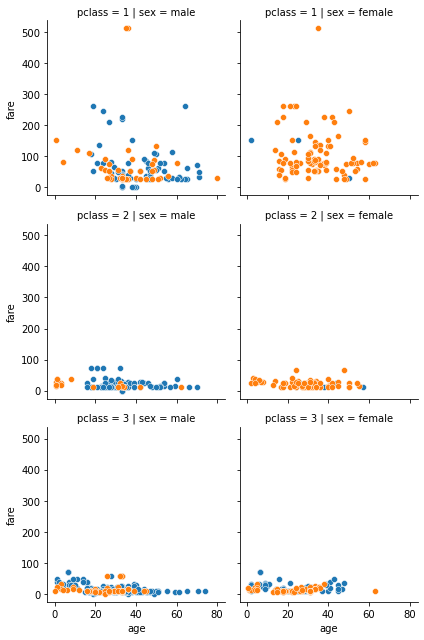

In [64]:
grid = sns.FacetGrid(
    data=titanic,
    row='pclass',
    col='sex',
    hue='survived'
)
grid.map(sns.scatterplot, 'age', 'fare')

In [65]:
filter1 = titanic['sex'] == 'female'
filter2 = titanic['pclass'] < 3
(filter1 & filter2)

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Length: 891, dtype: bool

In [66]:
titanic['female_from_2nd_class'] = (filter1 & filter2)
titanic

survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  31.333333      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male deck  embark_town alive  alone age_group  \
0     Third    man        True    F  Southampton    no  False  (15, 25]   
1     First  woman       False    C    Cherbourg   yes  False  (35, 45]   
2     Third  woman       False    F  Southampton   yes   True  (25, 35]   
3     First  woman       False    C  Southampton   yes  False  (25, 35]   
4     Third    man        True    F  Southampton    no   True  (25, 35]   
..      ...    ...         ...  ...          ...   ...    ...       ...   
886  Second    man        True    F  Southampton    no   True  (25, 35]   
887   First  woman       False    B  Southampton   yes   True  (15, 25]   
888   Third  woman       False    F  Southampton    no  False  (25, 35]   
889   First    man        True    C    Cherbourg   yes   True  (25, 35]   
890   Third    man        True    F   Queenstown    no   True  (25, 35]   

     female_from_2nd_class  
0                    False  
1                     True  
2                    False  
3                     True  
4                    False  
..                     ...  
886                  False  
887                   True  
888                  False  
889                  False  
890                  False  

[891 rows x 17 columns]

### Biến đổi phân phối: Tạo biến bằng Z-score

<AxesSubplot:xlabel='fare', ylabel='Count'>

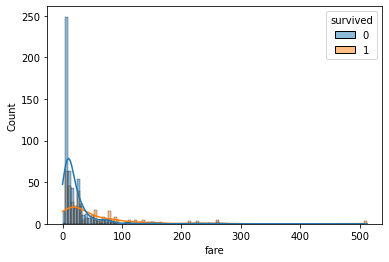

In [67]:
sns.histplot(titanic, x='fare', hue='survived', kde=True)

In [68]:
np.log(1000000000000)

27.631021115928547

In [69]:
np.log(10)

2.302585092994046

In [70]:
np.log(0) # e mũ x

C:\Users\levan\AppData\Local\Temp/ipykernel_22116/4294399625.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0) # e mũ x


-inf

In [72]:
np.log(-1)

C:\Users\levan\AppData\Local\Temp/ipykernel_22116/153577755.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan

In [73]:
np.log1p(0)

0.0

In [74]:
ser = np.log1p(titanic['fare'])
ser

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: fare, Length: 891, dtype: float64

<AxesSubplot:xlabel='fare', ylabel='Count'>

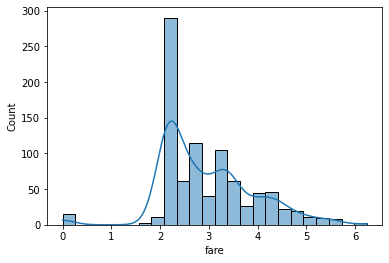

In [75]:
sns.histplot(ser, kde=True)

In [76]:
# Tính z-score
ser.mean(), ser.std()

(2.9622457416890775, 0.969048270122367)

In [77]:
new_ser = (ser - ser.mean())/ser.std()
new_ser

0     -0.879247
1      1.360456
2     -0.798092
3      1.061442
4     -0.783739
         ...   
886   -0.333511
887    0.486809
888    0.241871
889    0.486809
890   -0.818527
Name: fare, Length: 891, dtype: float64

<AxesSubplot:xlabel='fare', ylabel='Count'>

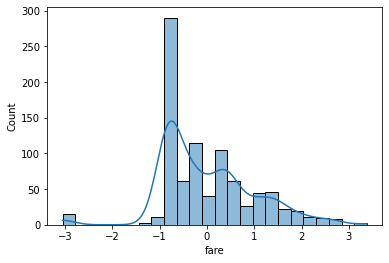

In [78]:
sns.histplot(new_ser, kde=True)

In [79]:
# standardize --> vì tất cả phân phối chuyển về các giá trị từ -3 đến 3

In [80]:
new_ser.mean(), new_ser.std()

(3.9302642696662946e-15, 1.0000000000000018)

In [81]:
## Data Sampling

In [82]:
# Tinh ti le survived

In [83]:
# Random sampling

In [84]:
# Sampling vs Bootstrap

In [85]:
# Sampling bang scikit learn

In [86]:
# 2**2 = 4 --> log2(4) = 2 --> log lấy ra số mũ
# log e -> e là hằn số ~ 2.718
# e**x = ??? --> ln(???) = x
# log(1000*(10**9)) ~ 27 --> e**27 = 1000 tỷ
# e**2.7 ~ 10